# PCA - let's start !

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
features = ['sepal length', 'sepal width', 'petal length', 'petal width']# Separating out the features
taget = 'target'

## Show data set

In [90]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [61]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [62]:
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
target           object
dtype: object

array([[<AxesSubplot:title={'center':'sepal length'}>,
        <AxesSubplot:title={'center':'sepal width'}>],
       [<AxesSubplot:title={'center':'petal length'}>,
        <AxesSubplot:title={'center':'petal width'}>]], dtype=object)

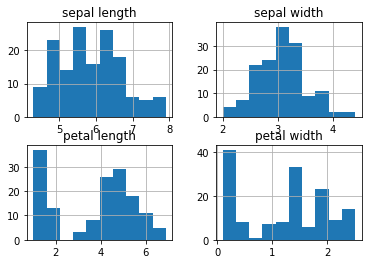

In [72]:
df.hist()

## Standardize the data

In [73]:
from sklearn.preprocessing import StandardScaler
x = df.loc[:, features].values # Separating out the target
y = df.loc[:,['target']].values # Standardizing the features
x = StandardScaler().fit_transform(x)

In [23]:
norm_df = pd.DataFrame(x, columns=features)
norm_df

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


Correlations


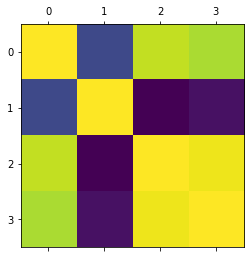

In [52]:
print('Correlations')
plt.matshow(df[features].corr())
plt.show()

## Let's do PCA

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents[1:3], columns = ['principal component 1', 'principal component 2'])


In [32]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


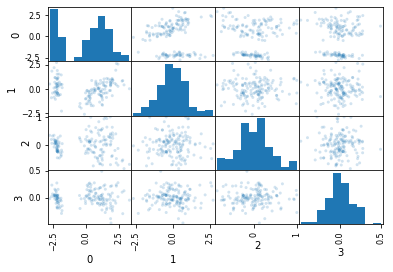

In [106]:
pcaFull = PCA(n_components=4)
transform = pca.fit_transform(x)
dfFull = pd.DataFrame(data=transform)
graph = pd.plotting.scatter_matrix(dfFull, alpha=0.2)

In [74]:
pca.get_covariance()

array([[ 0.9779242 , -0.10104477,  0.87069468,  0.86134879],
       [-0.10104477,  1.00395722, -0.41916911, -0.37286994],
       [ 0.87069468, -0.41916911,  1.04639367,  0.93676197],
       [ 0.86134879, -0.37286994,  0.93676197,  0.99857055]])

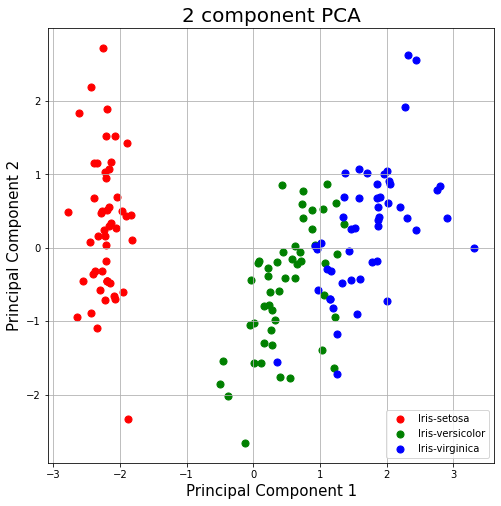

In [38]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'], c=color, s=50)
ax.legend(targets)
ax.grid()


In [41]:
expl = pca.explained_variance_ratio_
f'PC explain {expl[0]} and {expl[1]}, a total of {sum(expl)}'

'PC explain 0.7277045209380132 and 0.2303052326768065, a total of 0.9580097536148197'